## Outlier Detection and Treatment 

To work on outlier detection and treatment in Python using a raw dataset. We'll use a synthetic dataset for simplicity. The steps will include loading the data, detecting outliers using statistical methods, visualizing outliers, and then treating them.

#### Step 1: Import Libraries and Load Data
We'll create a synthetic dataset with some outliers.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
np.random.seed(10)
data = {
    'age': np.random.normal(loc=30, scale=5, size=100).tolist() + [100, 105, 110],  # Adding outliers
    'salary': np.random.normal(loc=50000, scale=15000, size=100).tolist() + [150000, 200000, 250000]  # Adding outliers
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Original DataFrame:")
print(df.head())


Original DataFrame:
         age        salary
0  36.657933  51762.134915
1  33.576395  21388.146678
2  22.272999  36156.361027
3  29.958081  57046.271511
4  33.106680  47834.498555


#### Step 2: Detect Outliers
##### Using Z-Score
The Z-score method calculates how many standard deviations a data point is from the mean.

In [3]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df))
outliers_zscore = df[(z_scores > 3).any(axis=1)]

print("\nOutliers detected using Z-score method:")
print(outliers_zscore)



Outliers detected using Z-score method:
       age    salary
100  100.0  150000.0
101  105.0  200000.0
102  110.0  250000.0


##### Using IQR (Interquartile Range)
The IQR method considers data points that lie outside 1.5 times the IQR above the third quartile or below the first quartile as outliers.


In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers detected using IQR method:")
print(outliers_iqr)



Outliers detected using IQR method:
            age         salary
59    28.189098    5306.048434
64    29.594389   15573.450066
100  100.000000  150000.000000
101  105.000000  200000.000000
102  110.000000  250000.000000


#### Step 3: Visualize Outliers
Using box plots to visualize outliers can be helpful.

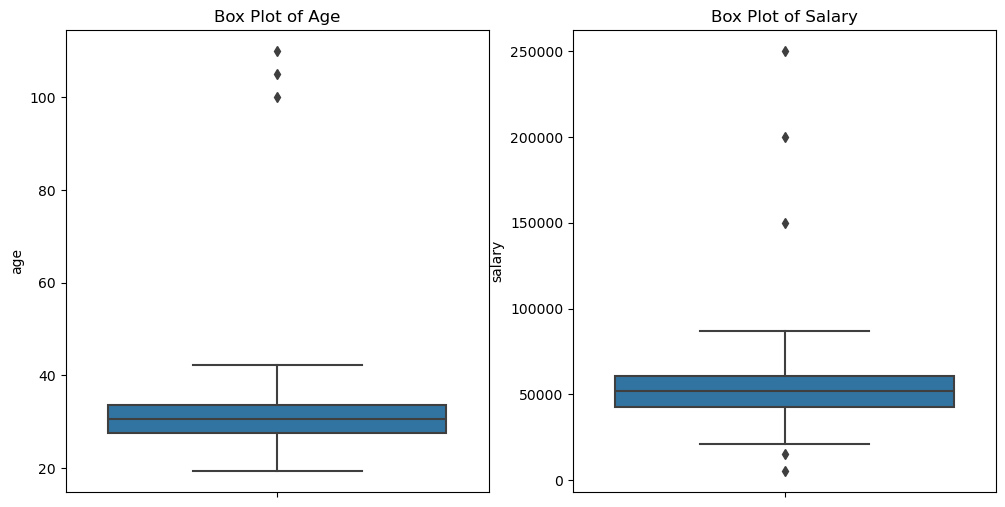

In [5]:
plt.figure(figsize=(12, 6))

# Box plot for age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Box Plot of Age')

# Box plot for salary
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary'])
plt.title('Box Plot of Salary')

plt.show()


#### Step 4: Treat Outliers

##### Removing Outliers
One common approach is to simply remove the outliers.

In [6]:
# Remove outliers using Z-score method
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("\nDataFrame after removing outliers (Z-score method):")
print(df_no_outliers)



DataFrame after removing outliers (Z-score method):
          age        salary
0   36.657933  51762.134915
1   33.576395  21388.146678
2   22.272999  36156.361027
3   29.958081  57046.271511
4   33.106680  47834.498555
..        ...           ...
95  34.591346  68827.605976
96  27.589534  64206.891173
97  30.447938  34665.339616
98  34.134993  67507.525526
99  20.227439  41420.347801

[100 rows x 2 columns]


##### Capping/Flooring Outliers
Another approach is to cap the outliers at a specified threshold, usually at the 1st and 99th percentiles.

In [7]:
# Capping/Flooring outliers
def cap_floor(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    series = np.where(series < lower_limit, lower_limit, series)
    series = np.where(series > upper_limit, upper_limit, series)
    return series

df['age'] = cap_floor(df['age'])
df['salary'] = cap_floor(df['salary'])

print("\nDataFrame after capping/flooring outliers:")
print(df)



DataFrame after capping/flooring outliers:
            age         salary
0     36.657933   51762.134915
1     33.576395   21388.146678
2     22.272999   36156.361027
3     29.958081   57046.271511
4     33.106680   47834.498555
..          ...            ...
98    34.134993   67507.525526
99    20.227439   41420.347801
100  100.000000  150000.000000
101  104.900000  199000.000000
102  104.900000  199000.000000

[103 rows x 2 columns]


##### Imputing Outliers
Replace outliers with a central value such as the mean or median of the data.

In [8]:
# Impute outliers with median
df['age'] = df['age'].apply(lambda x: df['age'].median() if (x < Q1['age'] - 1.5 * IQR['age']) or (x > Q3['age'] + 1.5 * IQR['age']) else x)
df['salary'] = df['salary'].apply(lambda x: df['salary'].median() if (x < Q1['salary'] - 1.5 * IQR['salary']) or (x > Q3['salary'] + 1.5 * IQR['salary']) else x)

print("\nDataFrame after imputing outliers with median:")
print(df)



DataFrame after imputing outliers with median:
           age        salary
0    36.657933  51762.134915
1    33.576395  21388.146678
2    22.272999  36156.361027
3    29.958081  57046.271511
4    33.106680  47834.498555
..         ...           ...
98   34.134993  67507.525526
99   20.227439  41420.347801
100  30.542743  51762.134915
101  30.542743  51762.134915
102  30.542743  51762.134915

[103 rows x 2 columns]


These methods help improve the quality of data analysis and ensure that statistical models and machine learning algorithms perform optimally by reducing the impact of anomalous data points. Feel free to adjust the thresholds and methods according to the specifics of your data and the requirements of your analysis.